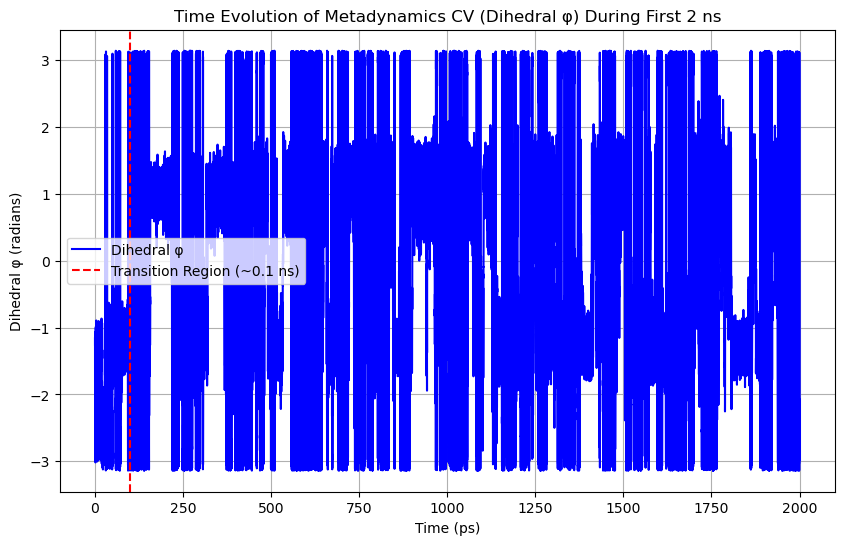

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the COLVAR file (assuming it is space-separated with proper column names)
colvar_file_name = 'COLVAR'  # Replace with your actual file name if needed
col_names = ["time", "phi", "psi", "metad.bias"]

# Read the data, skipping metadata lines and setting column names
colvar_data = pd.read_csv(colvar_file_name, delim_whitespace=True, comment='#', names=col_names, skiprows=4)

# Extract data from the first 2 ns (assuming time is in picoseconds)
time = colvar_data['time']
phi = colvar_data['phi']

# Limit to the first 2 ns (2000 ps)
time_limit = 2000  # First 2 ns in ps
filtered_time = time[time <= time_limit]
filtered_phi = phi[time <= time_limit]

# Plot the time evolution of the collective variable phi
plt.figure(figsize=(10, 6))
plt.plot(filtered_time, filtered_phi, label='Dihedral φ', color='b')
plt.axvline(x=100, color='r', linestyle='--', label='Transition Region (~0.1 ns)')

# Add plot details
plt.xlabel('Time (ps)')
plt.ylabel('Dihedral φ (radians)')
plt.title('Time Evolution of Metadynamics CV (Dihedral φ) During First 2 ns')
plt.legend()
plt.grid(True)
plt.show()


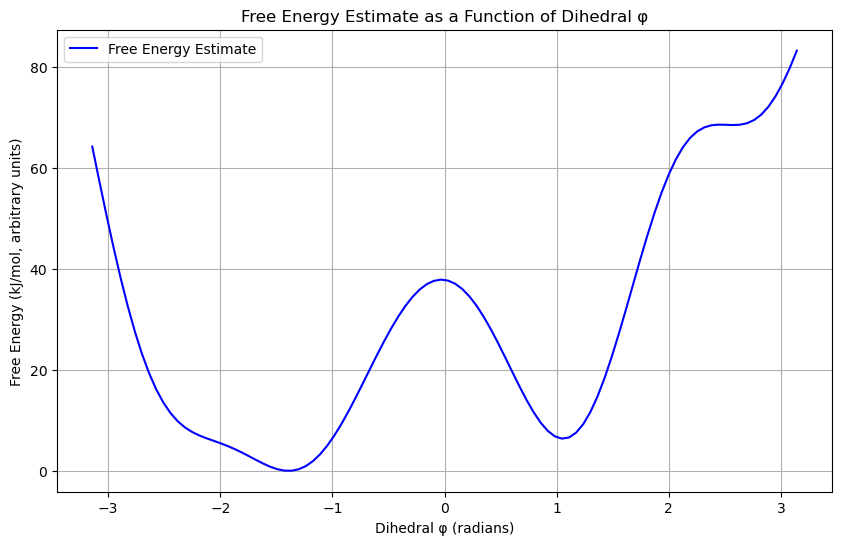

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the HILLS file (assuming it is space-separated)
hills_file_name = 'HILLS'  # Replace with your actual HILLS file name
col_names = ["time", "phi", "sigma_phi", "height", "bias_factor"]

# Read the HILLS data, skipping any metadata lines
hills_data = pd.read_csv(hills_file_name, delim_whitespace=True, names=col_names, comment='#')

# Extract relevant data
time = hills_data['time']
phi = hills_data['phi']
sigma_phi = hills_data['sigma_phi']
height = hills_data['height']

# Define a grid of phi values to calculate the free energy estimate
phi_grid = np.linspace(-np.pi, np.pi, 100)  # Assuming phi ranges from -π to π
free_energy = np.zeros_like(phi_grid)

# Accumulate Gaussian contributions to reconstruct the free energy profile
for i in range(len(phi)):
    gaussian_contribution = height[i] * np.exp(-((phi_grid - phi[i]) ** 2) / (2 * sigma_phi[i] ** 2))
    free_energy -= gaussian_contribution  # Subtracting since metadynamics adds hills to flatten FES

# Normalize free energy (optional)
free_energy -= np.min(free_energy)

# Plot the estimated free energy as a function of dihedral phi
plt.figure(figsize=(10, 6))
plt.plot(phi_grid, free_energy, label='Free Energy Estimate', color='b')
plt.xlabel('Dihedral φ (radians)')
plt.ylabel('Free Energy (kJ/mol, arbitrary units)')
plt.title('Free Energy Estimate as a Function of Dihedral φ')
plt.legend()
plt.grid(True)
plt.show()


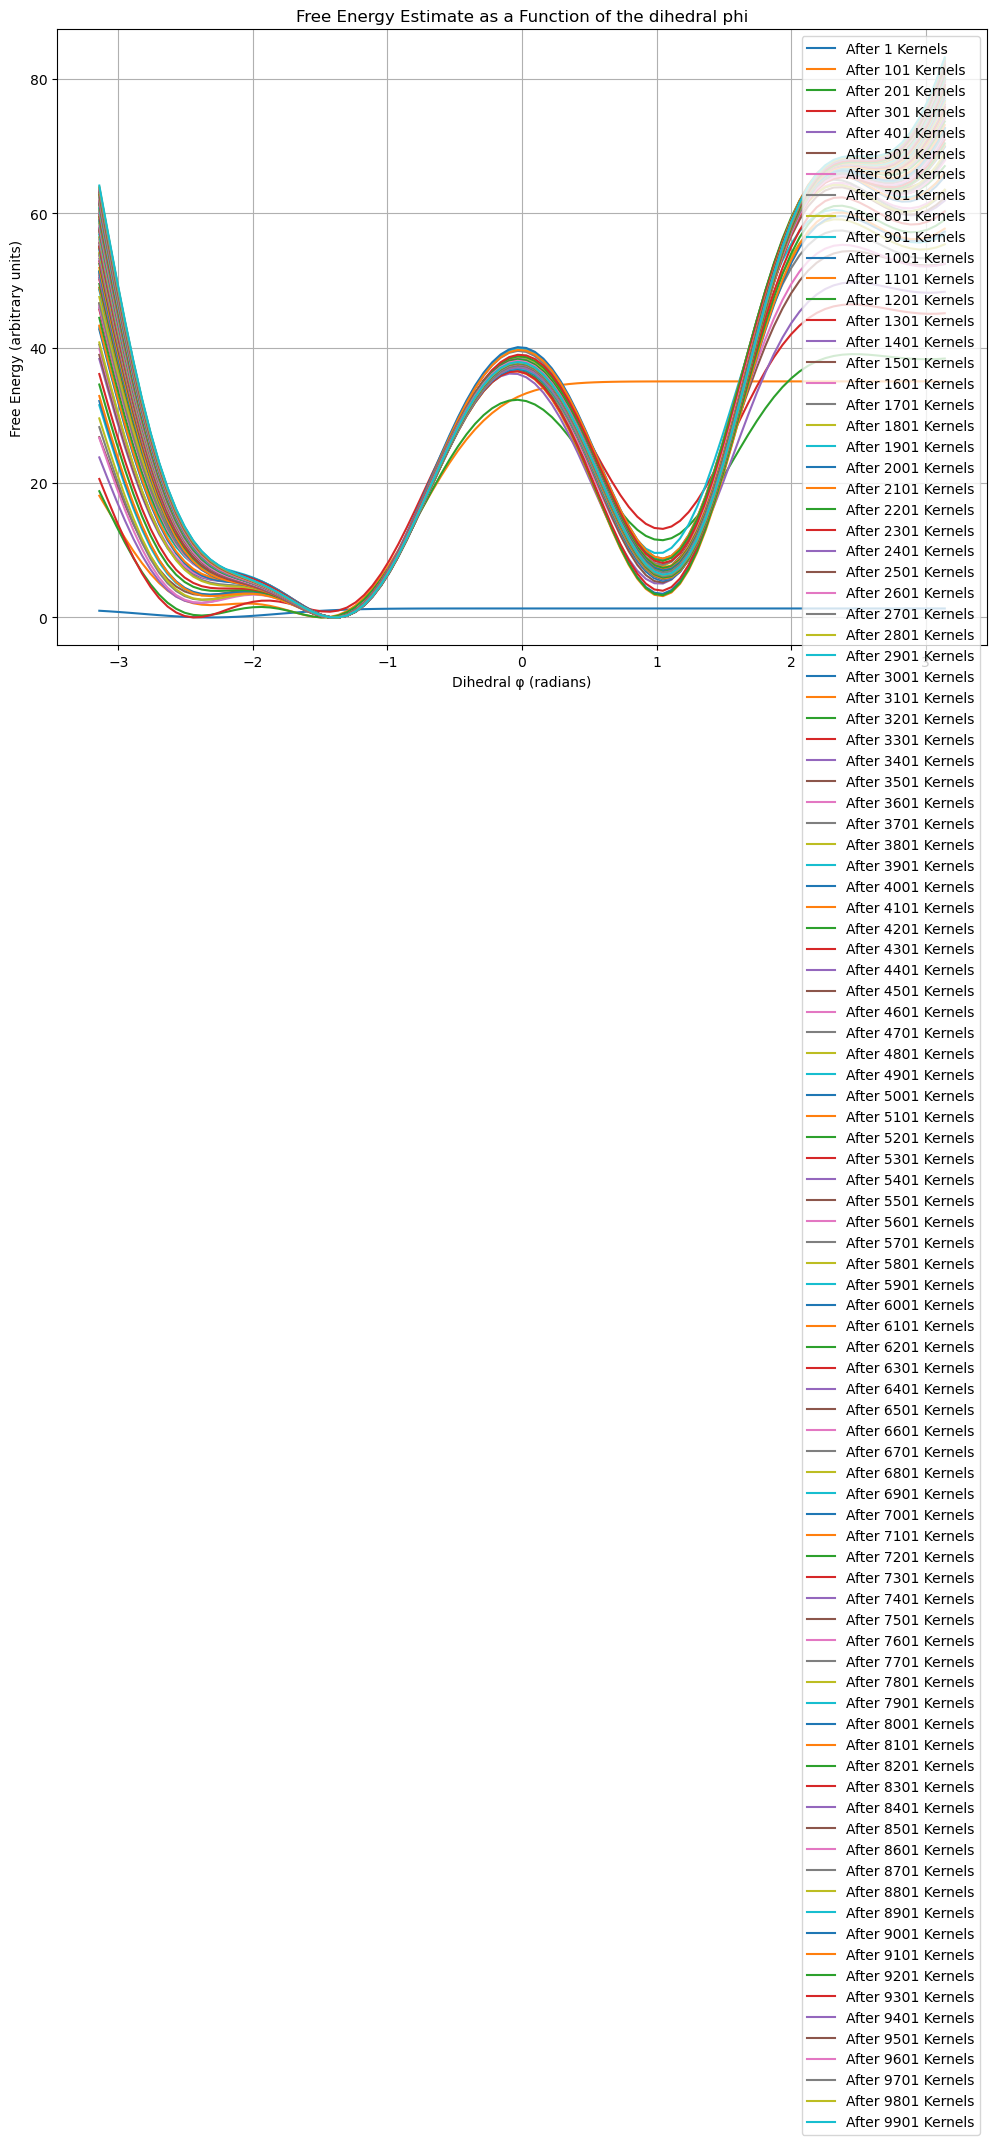

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the HILLS file (assuming it is space-separated)
hills_file_name = 'HILLS'  # Replace with your actual HILLS file name
col_names = ["time", "phi", "sigma_phi", "height", "bias_factor"]

# Read the HILLS data, skipping metadata lines
hills_data = pd.read_csv(hills_file_name, delim_whitespace=True, names=col_names, comment='#')

# Extract relevant data
time = hills_data['time']
phi = hills_data['phi']
sigma_phi = hills_data['sigma_phi']
height = hills_data['height']

# Define a grid of phi values to calculate the free energy estimate
phi_grid = np.linspace(-np.pi, np.pi, 100)  # Assuming phi ranges from -π to π

# Store free energy profiles calculated at different points (every 100 kernels)
free_energy_profiles = []

# Accumulate Gaussian contributions every 100 Gaussian kernels
for i in range(0, len(phi), 100):
    free_energy = np.zeros_like(phi_grid)

    # Calculate the accumulated free energy up to the current step
    for j in range(i + 1):
        gaussian_contribution = height[j] * np.exp(-((phi_grid - phi[j]) ** 2) / (2 * sigma_phi[j] ** 2))
        free_energy -= gaussian_contribution  # Subtracting to simulate metadynamics effect

    # Normalize free energy to set the minimum to zero
    free_energy -= np.min(free_energy)

    # Store the free energy profile
    free_energy_profiles.append((i + 1, free_energy))

# Plot the estimated free energy profiles at each step
plt.figure(figsize=(12, 8))

for num_gaussians, free_energy in free_energy_profiles:
    plt.plot(phi_grid, free_energy, label=f'After {num_gaussians} Kernels')

plt.xlabel('Dihedral φ (radians)')
plt.ylabel('Free Energy (arbitrary units)')
plt.title('Free Energy Estimate as a Function of the dihedral phi')
plt.legend()
plt.grid(True)
plt.show()


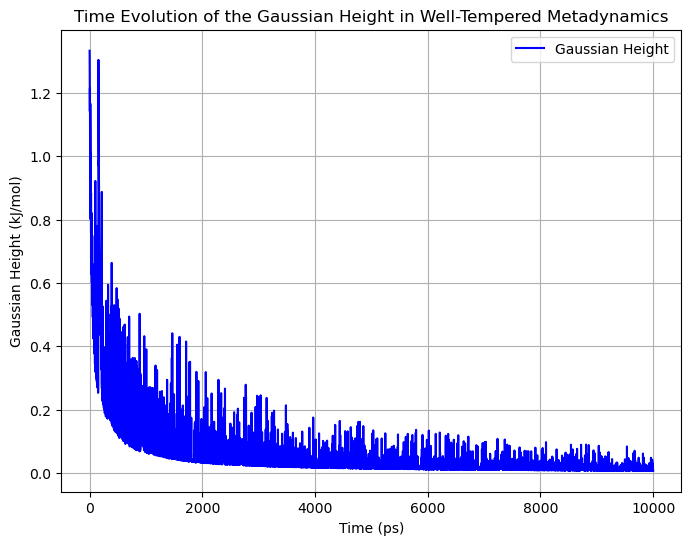

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Load the HILLS file, skipping the comment lines starting with '#!'
data = np.loadtxt('HILLS', comments='#!')

# Extract time and Gaussian height
time = data[:, 0]  # Time (first column)
height = data[:, 3]  # Gaussian height (fourth column)

# Plot the time evolution of the Gaussian height
plt.figure(figsize=(8, 6))
plt.plot(time, height, label="Gaussian Height", color='b')

# Label axes
plt.xlabel('Time (ps)')
plt.ylabel('Gaussian Height (kJ/mol)')
plt.title('Time Evolution of the Gaussian Height in Well-Tempered Metadynamics')

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
